In [82]:
import pandas as pd  
import numpy as np 
pd.set_option('display.max_columns', None)
data = pd.read_csv("C:/Users/99470/Downloads/heart_disease_dataset.csv", sep=";")
df = data.copy()

In [83]:
df.columns=df.columns.str.replace(' ','_')

In [84]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
df.count()

age                        303
sex                        303
chest_pain_type            303
resting_blood_pressure     303
cholesterol                303
fasting_blood_sugar        303
rest_ecg                   303
max_heart_rate_achieved    303
exercise_induced_angina    303
st_depression              303
st_slope                   303
num_major_vessels          303
thalassemia                303
target                     303
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [88]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [89]:
df.duplicated().sum()

1

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.duplicated().sum()

0

In [92]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [93]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

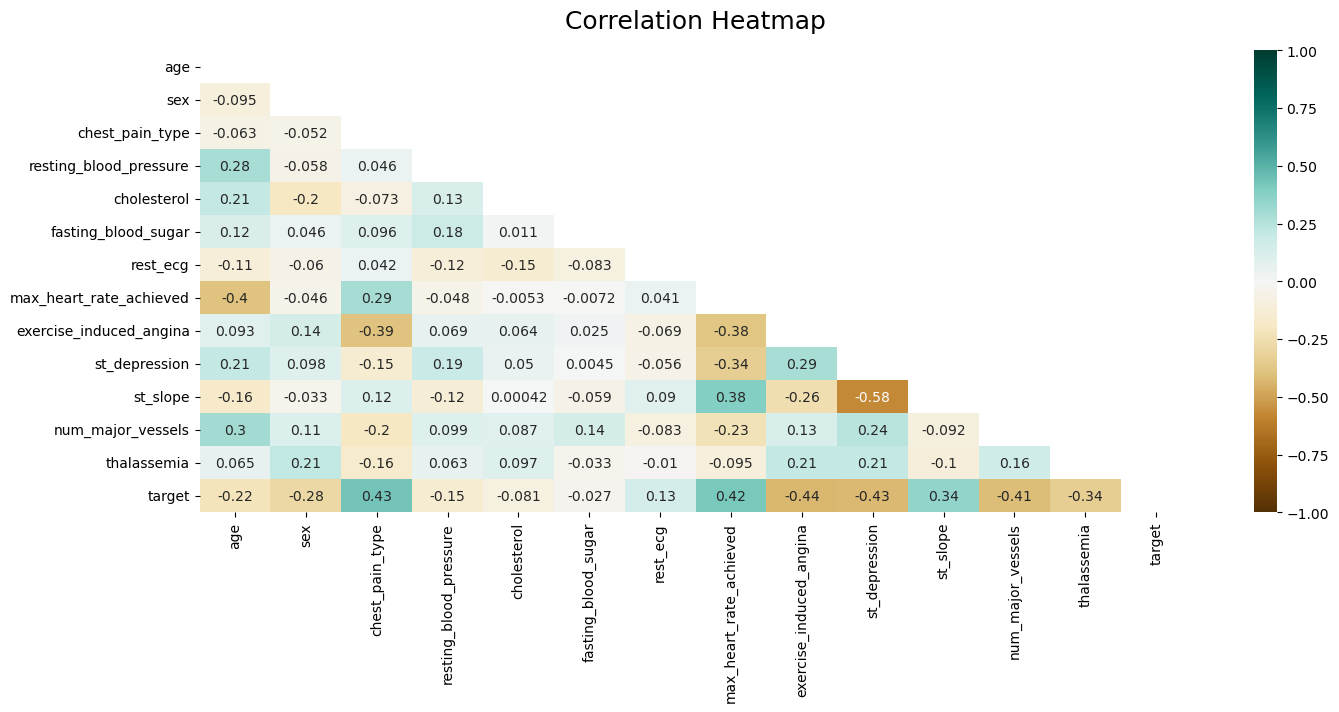

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt  
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

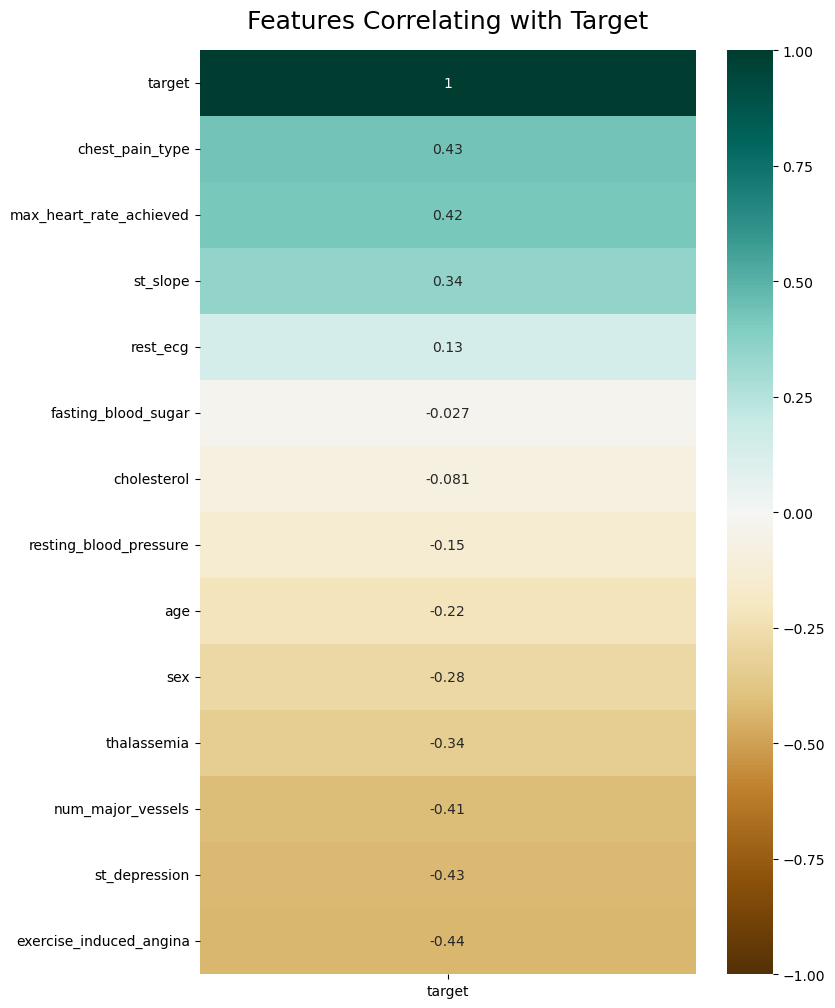

In [95]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

In [96]:
y=df["target"].values.reshape(-1,1)
X = df.drop("target",axis=1)
X_cols=X.columns

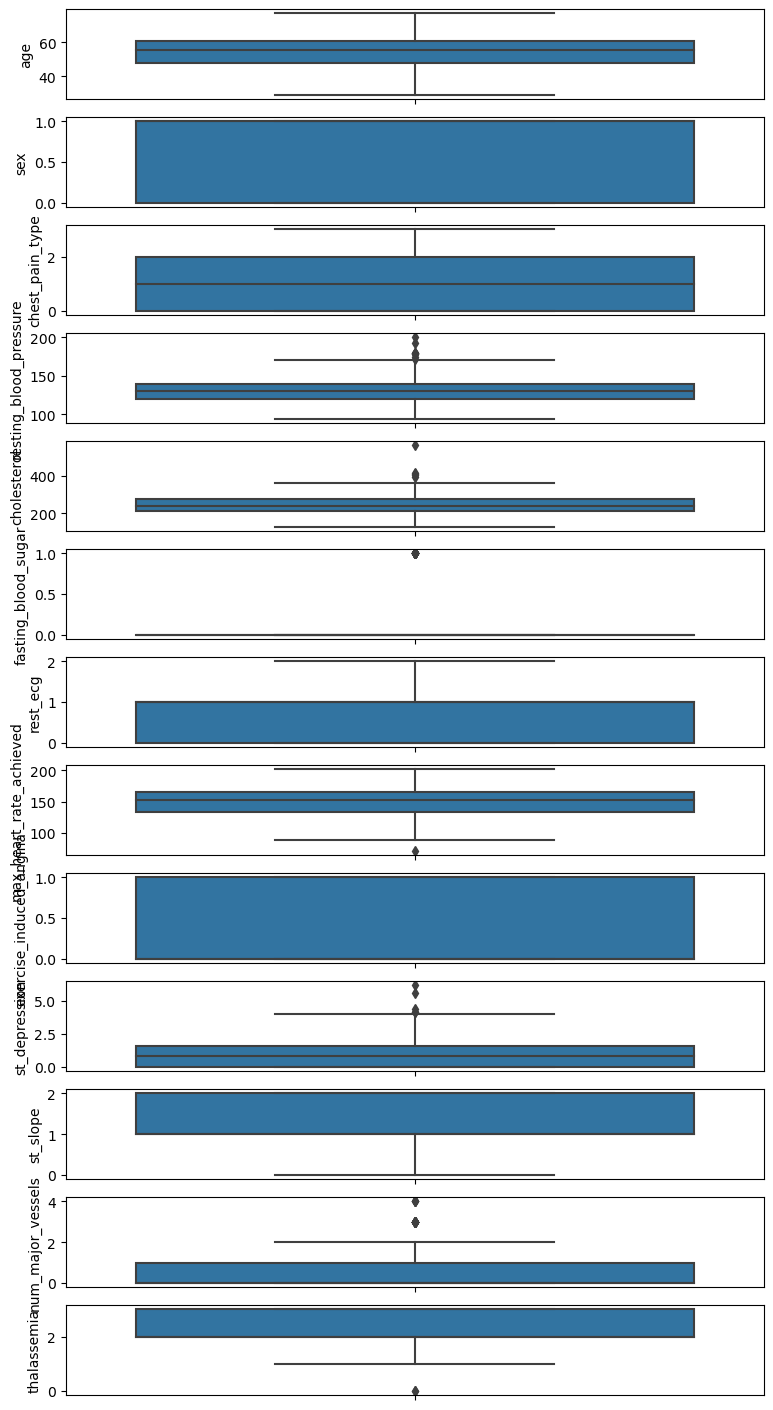

In [97]:
num_cols=X.columns
fig, axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
    sns.boxplot(ax=axes[i],y=num_cols[i],data=X)

In [98]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [99]:
for cols in X_cols:
    upper_bound,lower_bound = outlier_detection(X[cols])
    X[cols] = np.clip(X[cols],a_min=lower_bound,a_max=upper_bound)

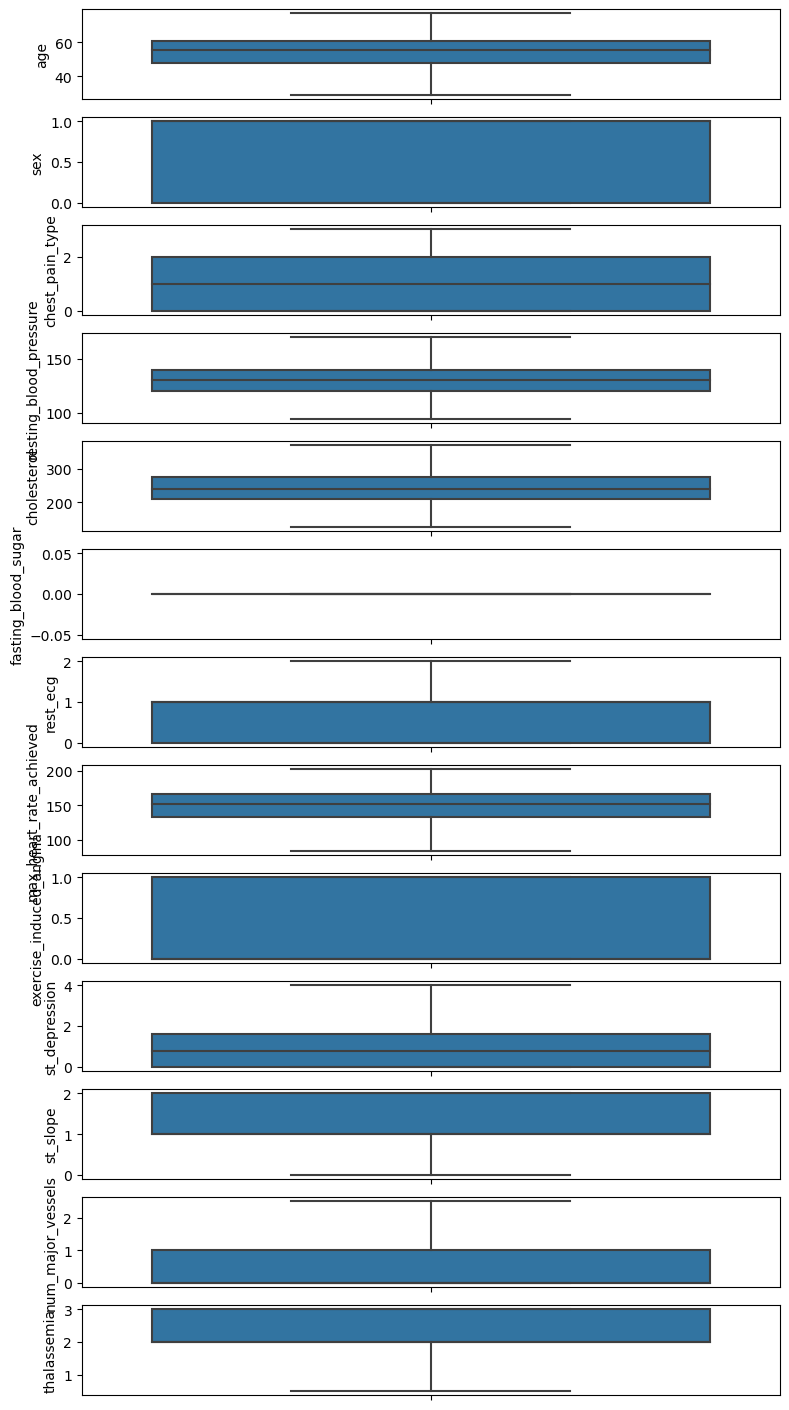

In [100]:
fig, axes = plt.subplots(nrows=len(X_cols),figsize=(9,18))
for i in range(len(X_cols)):
    sns.boxplot(ax=axes[i],y=X_cols[i],data=X)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [102]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=1,
                                                     shuffle=True, stratify = y
                                                    )

In [128]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],4) 
        self.W2   = np.random.rand(4,1)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.4

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W2)
        d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
    
    def print_output(self):
        print(self.output)

In [129]:
epochs = 10
learning_rate = 0.3
ann = ArtificialNeuralNetwork(X_train,y_train)
ann.train(epochs, learning_rate)

[[0.97558071 0.90343123 0.89307282 0.86304527 0.85541171 0.90623685
  0.9653932  0.90899327 0.91612401 0.93187064 0.91138522 0.88041459
  0.79903069 0.86404719 0.94283533 0.9768454  0.89582491 0.93674703
  0.85021808 0.94533339 0.82448747 0.96506955 0.96183185 0.94454086
  0.9854502  0.96872662 0.9045502  0.91834693 0.86049472 0.90424285
  0.91446575 0.96862992 0.93532859 0.97201107 0.79168306 0.96349106
  0.90147065 0.9458059  0.778231   0.89061775 0.89214713 0.9089364
  0.79217259 0.90310504 0.97114446 0.88375956 0.89572006 0.91788662
  0.90942753 0.90637823 0.93233413 0.89548112 0.88911965 0.93610491
  0.92704577 0.88082046 0.81118729 0.9590299  0.94594893 0.94044723
  0.81622383 0.91415947 0.96103641 0.91814448 0.86875035 0.93986809
  0.94040066 0.90063379 0.96063    0.95825296 0.95728639 0.93664072
  0.94324814 0.86173023 0.95640252 0.89810854 0.96711471 0.89519968
  0.91501855 0.95578619 0.93947355 0.74510697 0.91101525 0.95929642
  0.95081541 0.90060954 0.95383843 0.96005459 0.9

In [130]:
ann.print_output()

[[4.95425797e-05]
 [6.90467539e-05]
 [1.14179566e-04]
 [5.42334149e-05]
 [9.77466861e-05]
 [5.07252926e-05]
 [4.19485789e-05]
 [4.72716025e-05]
 [4.19549351e-05]
 [1.11798029e-04]
 [5.58183406e-05]
 [5.46276204e-05]
 [1.16322300e-04]
 [1.06551669e-04]
 [5.98288649e-05]
 [3.15763622e-05]
 [6.78973879e-05]
 [4.63589293e-05]
 [1.09371900e-04]
 [7.69738388e-05]
 [1.11549793e-04]
 [4.98826359e-05]
 [4.23043628e-05]
 [5.40228937e-05]
 [3.22761438e-05]
 [2.64378831e-05]
 [1.07107793e-04]
 [5.65310487e-05]
 [4.43219391e-05]
 [8.02713939e-05]
 [1.10586662e-04]
 [6.37770687e-05]
 [5.01497828e-05]
 [3.40682929e-05]
 [1.54925194e-04]
 [4.66751291e-05]
 [7.54370980e-05]
 [4.56211902e-05]
 [1.57372733e-04]
 [5.99449124e-05]
 [4.67382123e-05]
 [6.10347523e-05]
 [9.87776936e-05]
 [9.32399193e-05]
 [4.70314480e-05]
 [8.64790564e-05]
 [7.64168772e-05]
 [5.69339733e-05]
 [6.21973832e-05]
 [1.16418630e-04]
 [4.75352558e-05]
 [3.74301292e-05]
 [8.33464093e-05]
 [1.13561062e-04]
 [6.31117913e-05]
 [4.357092